# NEURAL NETWORK ON GAS TURBINE DATASET

In [1]:
# Create your first MLP in Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
import numpy
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
#Checking for null values & data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


## Data Visualization

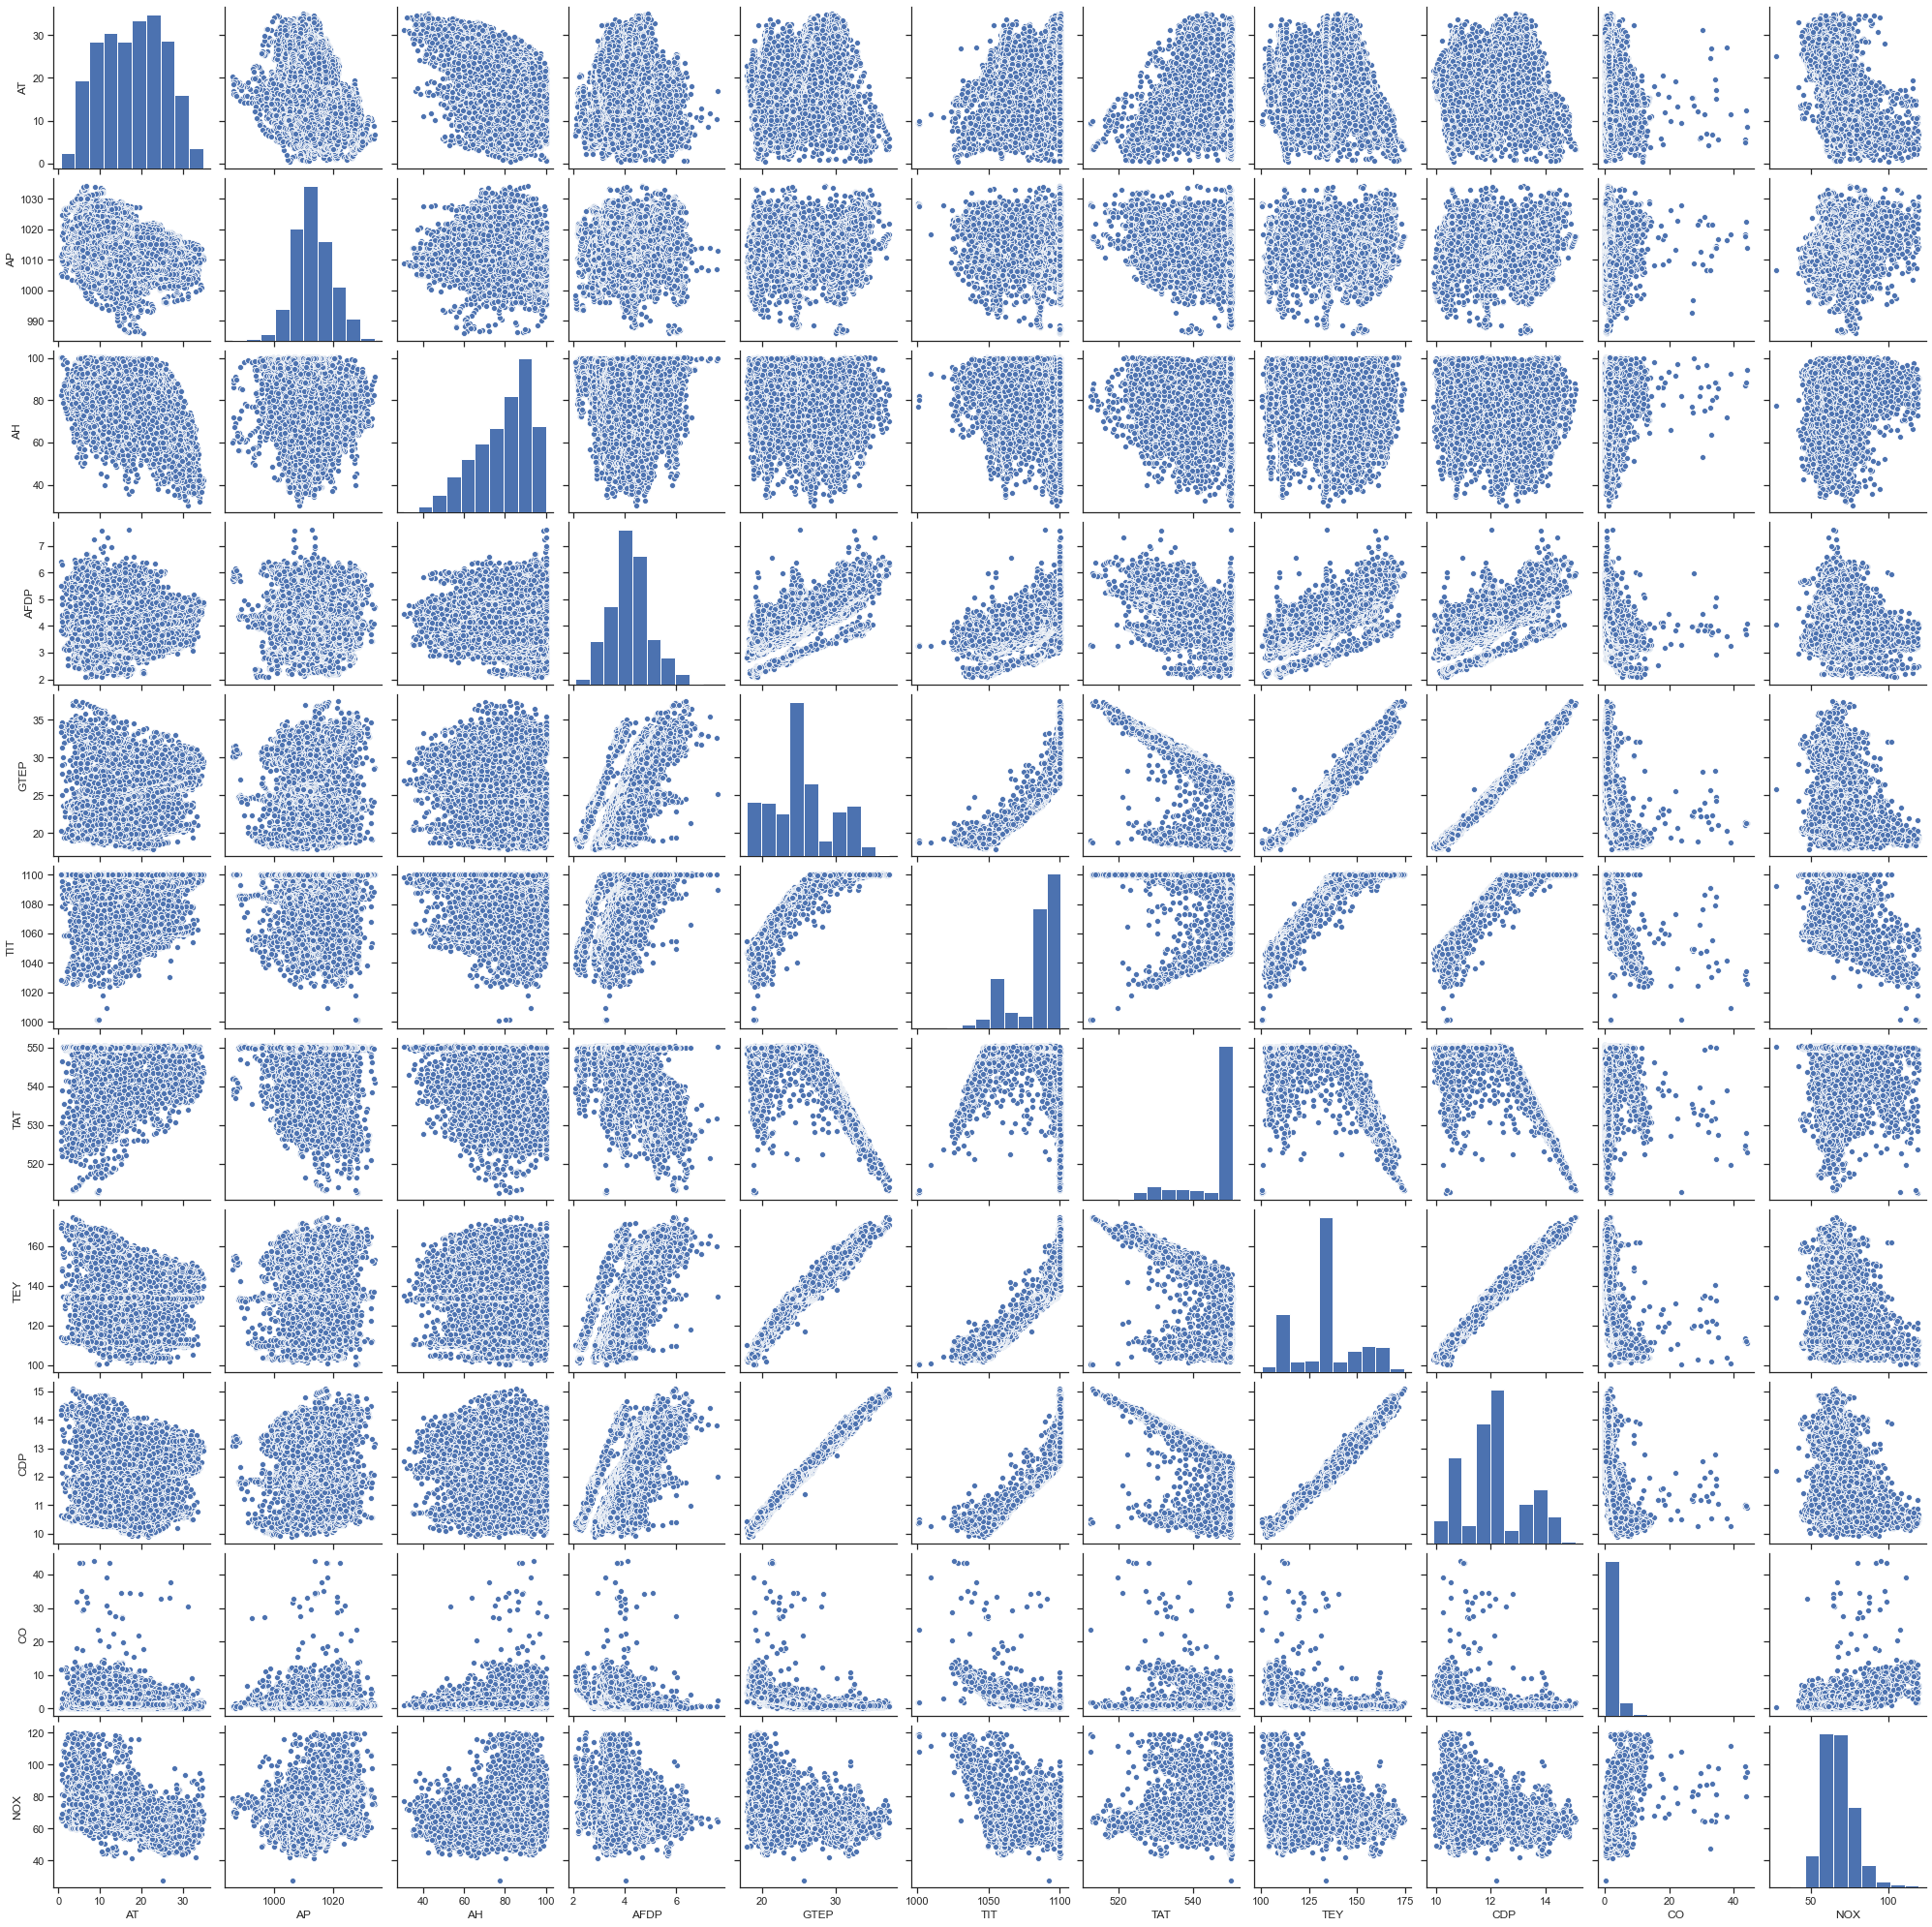

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)
import matplotlib.pyplot as plt
plt.show()

In [5]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

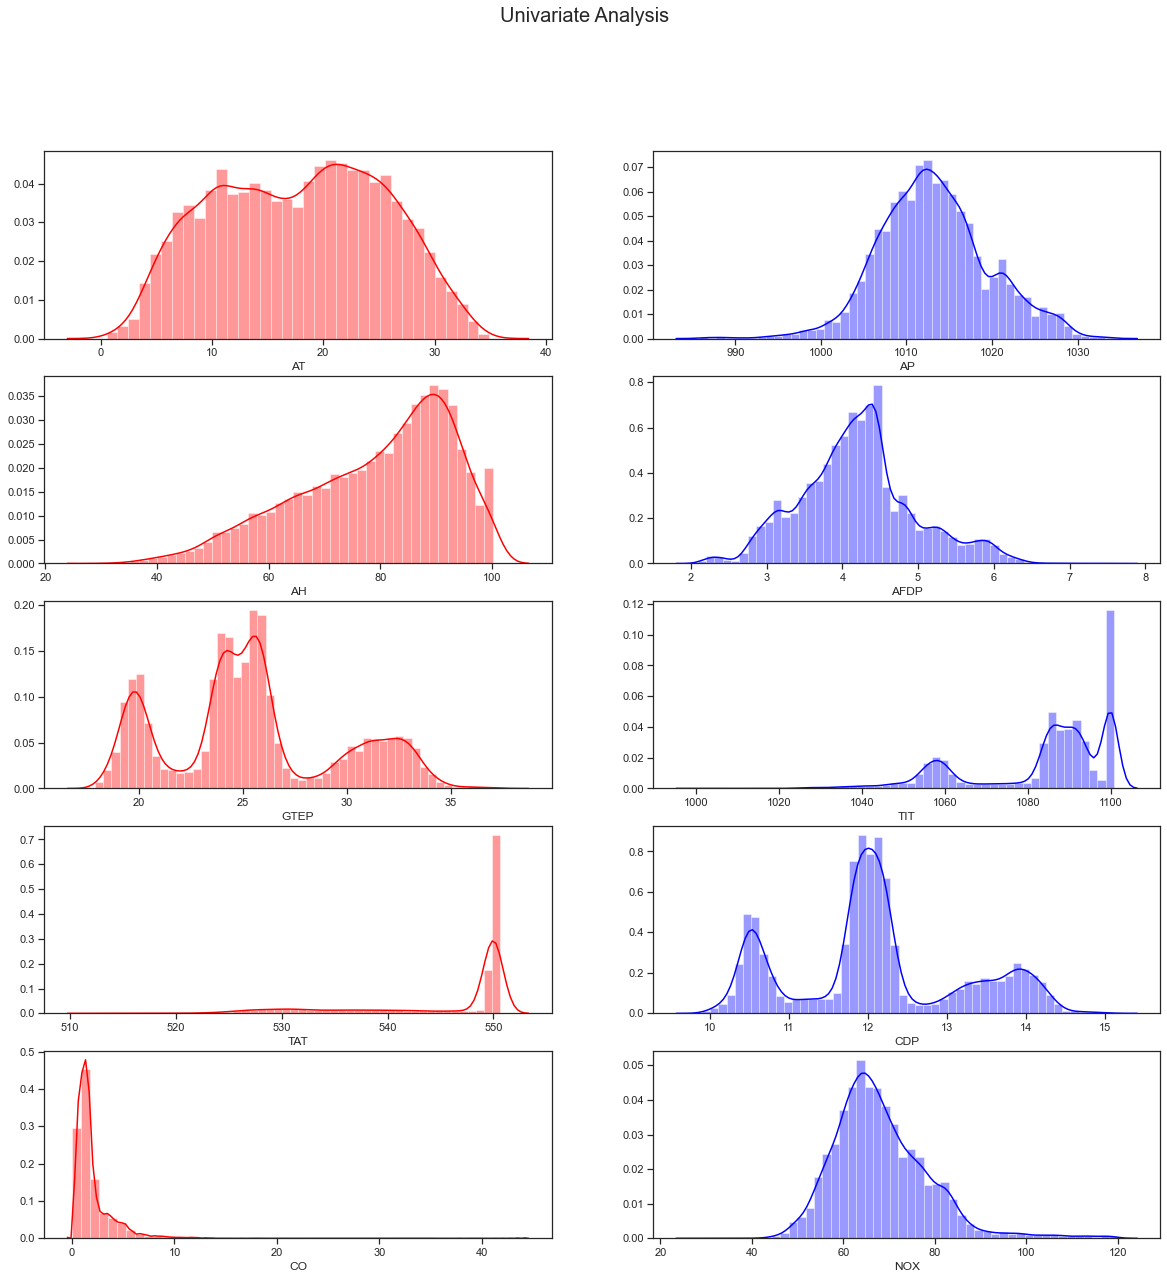

In [6]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(data['AT'],ax=axes[0,0],color='red')
sns.distplot(data['AP'],ax=axes[0,1],color='blue')
sns.distplot(data['AH'],ax=axes[1,0],color='red')
sns.distplot(data['AFDP'],ax=axes[1,1],color='blue')
sns.distplot(data['GTEP'],ax=axes[2,0],color='red')
sns.distplot(data['TIT'],ax=axes[2,1],color='blue')
sns.distplot(data['TAT'],ax=axes[3,0],color='red')
sns.distplot(data['CDP'],ax=axes[3,1],color='blue')
sns.distplot(data['CO'],ax=axes[4,0],color='red')
sns.distplot(data['NOX'],ax=axes[4,1],color='blue')

## Inferences:
### 1.Left Skewness : AH | TIT | TAT
### 2.Right Skewness : AFDP | CO
### 3. AT | NOX seems to have normally distribution

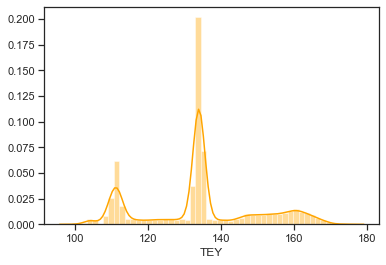

In [7]:
sns.distplot(data['TEY'],color='orange')

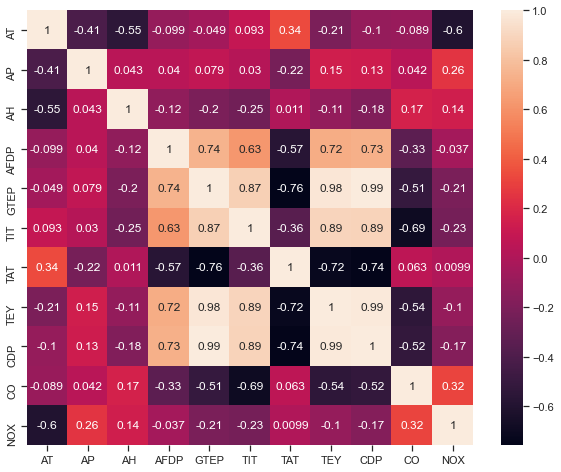

In [8]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)

## Split the data

In [9]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

## Normalizing the value

In [10]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
X=norm_func(X)

In [12]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087


In [13]:
Y=norm_func(y)

In [14]:
Y.head()

,TEY
0,0.195191
1,0.195459
2,0.195325
3,0.195459
4,0.195459


# Creating model

In [15]:
# Importing necessary packages
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

## mean squared error loss function because of regression values

## Iteration 1

In [16]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
1504/1504 [==============================] - 2s 848us/step - loss: 0.0034 - accuracy: 1.3299e-04
Epoch 2/150
1504/1504 [==============================] - 1s 885us/step - loss: 3.5003e-04 - accuracy: 1.3299e-04
Epoch 3/150
1504/1504 [==============================] - 1s 888us/step - loss: 2.2218e-04 - accuracy: 1.3299e-04
Epoch 4/150
1504/1504 [==============================] - 1s 781us/step - loss: 1.8079e-04 - accuracy: 1.3299e-04
Epoch 5/150
1504/1504 [==============================] - 1s 831us/step - loss: 1.5561e-04 - accuracy: 1.3299e-04
Epoch 6/150
1504/1504 [==============================] - 1s 742us/step - loss: 1.4844e-04 - accuracy: 1.3299e-04
Epoch 7/150
1504/1504 [==============================] - 1s 715us/step - loss: 1.3910e-04 - accuracy: 1.3299e-04
Epoch 8/150
1504/1504 [==============================] - 1s 766us/step - loss: 1.3527e-04 - accuracy: 1.3299e-04
Epoch 9/150
1504/1504 [==============================] - 1s 820us/step - loss: 1.3382e-04 - accuracy

1504/1504 [==============================] - 1s 927us/step - loss: 9.0313e-05 - accuracy: 1.3299e-04
Epoch 74/150
1504/1504 [==============================] - 1s 797us/step - loss: 8.8178e-05 - accuracy: 1.3299e-04
Epoch 75/150
1504/1504 [==============================] - 1s 695us/step - loss: 8.8531e-05 - accuracy: 1.3299e-04
Epoch 76/150
1504/1504 [==============================] - 1s 725us/step - loss: 8.9392e-05 - accuracy: 1.3299e-04
Epoch 77/150
1504/1504 [==============================] - 1s 781us/step - loss: 8.9275e-05 - accuracy: 1.3299e-04
Epoch 78/150
1504/1504 [==============================] - 1s 835us/step - loss: 8.8913e-05 - accuracy: 1.3299e-04
Epoch 79/150
1504/1504 [==============================] - 1s 715us/step - loss: 9.0608e-05 - accuracy: 1.3299e-04
Epoch 80/150
1504/1504 [==============================] - 1s 745us/step - loss: 8.9897e-05 - accuracy: 1.3299e-04
Epoch 81/150
1504/1504 [==============================] - 1s 771us/step - loss: 8.8542e-05 - accuracy

1504/1504 [==============================] - 1s 701us/step - loss: 8.2337e-05 - accuracy: 1.3299e-04
Epoch 145/150
1504/1504 [==============================] - 1s 690us/step - loss: 8.1694e-05 - accuracy: 1.3299e-04
Epoch 146/150
1504/1504 [==============================] - 1s 760us/step - loss: 8.3206e-05 - accuracy: 1.3299e-04
Epoch 147/150
1504/1504 [==============================] - 1s 758us/step - loss: 8.3263e-05 - accuracy: 1.3299e-04
Epoch 148/150
1504/1504 [==============================] - 1s 727us/step - loss: 8.2399e-05 - accuracy: 1.3299e-04
Epoch 149/150
1504/1504 [==============================] - 1s 734us/step - loss: 8.2428e-05 - accuracy: 1.3299e-04
Epoch 150/150
1504/1504 [==============================] - 1s 797us/step - loss: 8.3239e-05 - accuracy: 1.3299e-04


In [20]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 751us/step - loss: 7.5800e-05 - accuracy: 1.3299e-04
accuracy: 0.01%


## Iteration 2

In [21]:
# create model
model1 = Sequential()
model1.add(Dense(12, input_dim=10, activation='sigmoid'))
model1.add(Dense(8,activation='sigmoid'))
model1.add(Dense(1,activation='relu'))

# Compile model
model1.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])

# Fit the model
model1.fit(X, Y, validation_split=0.3, epochs=100, batch_size=15)

Epoch 1/100
702/702 [==============================] - 2s 1ms/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 2/100
702/702 [==============================] - 1s 1ms/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 3/100
702/702 [==============================] - 1s 1ms/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 4/100
702/702 [==============================] - 1s 968us/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 5/100
702/702 [==============================] - 1s 1ms/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 6/100
702/702 [==============================] - 1s 1ms/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 7/100
702/702 [==============================] - 1s 998us/step - loss: 0.1637 - accura

Epoch 55/100
702/702 [==============================] - 1s 1ms/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 56/100
702/702 [==============================] - 1s 1ms/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 57/100
702/702 [==============================] - 1s 984us/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 58/100
702/702 [==============================] - 1s 1ms/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 59/100
702/702 [==============================] - 1s 1ms/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 60/100
702/702 [==============================] - 1s 913us/step - loss: 0.1637 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 2.2163e-04
Epoch 61/100
702/702 [==============================] - 1s 881us/step - loss: 0.1637

In [22]:
# evaluate the model
scores = model1.evaluate(X, Y)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 675us/step - loss: 0.1554 - accuracy: 6.6494e-05
accuracy: 0.01%


## Iteration 3

In [23]:
# create model
model2 = Sequential()
model2.add(Dense(12, input_dim=10, activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1,activation='relu'))

# Compile model
model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

# Fit the model
model2.fit(X, Y, validation_split=0.3, epochs=200, batch_size=15)

Epoch 1/200
702/702 [==============================] - 2s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 2/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 3/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 4/200
702/702 [==============================] - 1s 927us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 5/200
702/702 [==============================] - 1s 925us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 6/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 7/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accura

Epoch 55/200
702/702 [==============================] - 1s 874us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 56/200
702/702 [==============================] - 1s 890us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 57/200
702/702 [==============================] - 1s 889us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 58/200
702/702 [==============================] - 1s 911us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 59/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 60/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 61/200
702/702 [==============================] - 1s 1ms/step - loss: 0.47

702/702 [==============================] - 1s 929us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 109/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 110/200
702/702 [==============================] - 1s 872us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 111/200
702/702 [==============================] - 1s 978us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 112/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 113/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 114/200
702/702 [==============================] - 1s 983us/step - loss: 0.4736 - ac

702/702 [==============================] - 1s 918us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 162/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 163/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 164/200
702/702 [==============================] - 1s 909us/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 165/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 166/200
702/702 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.4183 - val_accuracy: 2.2163e-04
Epoch 167/200
702/702 [==============================] - 1s 924us/step - loss: 0.4736 - accu

In [24]:
# evaluate the model
scores = model2.evaluate(X, Y)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 638us/step - loss: 0.4570 - accuracy: 6.6494e-05
accuracy: 0.01%


## OUT of three iteration almost all the iteration and mean squared function gives same and very low accuracy of 0.01% almost zero accuracy

## Tuning of Hyperparameters :- Batch Size and Epochs

In [25]:
# create model
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(20,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_logarithmic_error',optimizer=adam,metrics=['accuracy'])
    return model

In [26]:
model=KerasClassifier(build_fn=create_model,verbose=0)
# Define Grid Search parameters
batch_size=[10,20]
epochs=[10,50]
# Creating dictionary of Grid Search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)
# Built and Fit the Grid Search CV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.000, total=  10.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.000, total=   9.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.000, total=   9.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.000, total=   8.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.000, total=   9.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  37.5s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  38.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.0min remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  38.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.7min remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  38.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.3min remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  38.3s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.000, total=   4.3s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.000, total=   4.3s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.000, total=   5.3s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.000, total=   5.0s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.000, total=   4.6s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.000, total=  19.4s
[CV] batch_size=20, epochs=50 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.0min finished


In [27]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 50}
0.0,0.0 with: {'batch_size': 20, 'epochs': 10}
0.0,0.0 with: {'batch_size': 20, 'epochs': 50}


## Tuning of Hyperparameters: Learning Rate & Dropout Rate

In [40]:
from keras.layers import Dropout
from tensorflow.keras.layers import Dense

# Define the model
def create_model(learning_rate,dropout_rate):
    model=Sequential()
    model.add(Dense(12,input_dim=10,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim=6,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss='mean_squared_logarithmic_error',optimizer=adam,metrics=['accuracy'])
    return model

In [41]:
# Create the model
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=20,epochs=10)

#Define grid search parameters
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]

param_grid=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

In [42]:
#fit the GridSearch CV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.000, total=  13.7s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.000, total=  17.1s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.7s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.000, total=  14.4s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   45.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.000, total=  14.5s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   59.6s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.000, total=  14.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.000, total=  13.7s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.5min remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.000, total=  13.5s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.7min remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.000, total=  13.7s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.9min remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.000, total=  14.6s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.2min remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.000, total=  15.8s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.000, total=  12.6s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.000, total=  15.0s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.000, total=  12.7s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.000, total=  12.6s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.000, total=  12.0s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.000, total=  13.2s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  9.0min finished


In [43]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [45]:
def create_model(activation_fn, kernel_initializer):
    model=Sequential()
    model.add(Dense(12,input_dim=10,kernel_initializer=kernel_initializer,activation=activation_fn))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim=8, kernel_initializer=kernel_initializer,activation=activation_fn))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer=kernel_initializer,activation=activation_fn))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_logarithmic_error',metrics=['accuracy'],optimizer=adam)
    return model

In [46]:
model=KerasClassifier(build_fn=create_model,verbose=10,batch_size=20,epochs=10)
activation_fn=['softmax','relu','tanh','linear']
kernel_initializer=['uniform','normal','zero']

param_grid=dict(activation_fn=activation_fn,kernel_initializer=kernel_initializer)

In [47]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,verbose=10,cv=KFold())
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.000, total=   5.8s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.000, total=   5.7s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.4s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.000, total=   5.2s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.6s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.000, total=   4.9s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.6s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.000, total=   5.1s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.6s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.000, total=   5.2s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.8s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.000, total=   5.7s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   37.5s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.000, total=   5.0s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   42.5s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.000, total=   5.4s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   47.9s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.000, total=   7.4s
[CV] activation_fn=softmax, kernel_initializer=zero ..................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=zero, score=0.000, total=   7.1s
[CV] activation_fn=softmax, kernel_initializer=zero ..................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=zero, score=0.000, total=   5.9s
[CV] activation_fn=softmax, kernel_initializer=zero ..................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=zero, score=0.000, total=   6.0s
[CV] activation_fn=softmax, 

Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=tanh, kernel_initializer=zero, score=0.000, total=   5.0s
[CV] activation_fn=tanh, kernel_initializer=zero .....................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=tanh, kernel_initializer=zero, score=0.000, total=   5.1s
[CV] activation_fn=tanh, kernel_initializer=zero .....................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=tanh, kernel_initializer=zero, score=0.000, total=   4.7s
[CV] activation_fn=tanh, kernel_initializer=zero .....................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=tanh, kernel_initializer=zero, score=0.000, total=   5.3s
[CV] activation_fn=tanh, kernel_initializer=zero .....................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoc

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  5.4min finished


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [49]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00033255736343562603, using {'activation_fn': 'relu', 'kernel_initializer': 'zero'}
0.0,0.0 with: {'activation_fn': 'softmax', 'kernel_initializer': 'uniform'}
0.0,0.0 with: {'activation_fn': 'softmax', 'kernel_initializer': 'normal'}
0.0,0.0 with: {'activation_fn': 'softmax', 'kernel_initializer': 'zero'}
0.0,0.0 with: {'activation_fn': 'relu', 'kernel_initializer': 'uniform'}
0.0,0.0 with: {'activation_fn': 'relu', 'kernel_initializer': 'normal'}
0.00033255736343562603,0.0006651147268712521 with: {'activation_fn': 'relu', 'kernel_initializer': 'zero'}
0.0,0.0 with: {'activation_fn': 'tanh', 'kernel_initializer': 'uniform'}
0.0,0.0 with: {'activation_fn': 'tanh', 'kernel_initializer': 'normal'}
0.00033255736343562603,0.0006651147268712521 with: {'activation_fn': 'tanh', 'kernel_initializer': 'zero'}
0.0001330229453742504,0.0002660458907485008 with: {'activation_fn': 'linear', 'kernel_initializer': 'uniform'}
6.65114726871252e-05,0.0001330229453742504 with: {'activation_fn': '

## Tuning of Hyperparameter :-Number of Neurons in activation layer

In [50]:
def create_model(neuron1,neuron2):
    model=Sequential()
    model.add(Dense(neuron1,input_dim=10,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_logarithmic_error',metrics=['accuracy'],optimizer=adam)
    return model

In [51]:
model=KerasClassifier(build_fn=create_model,verbose=10,batch_size=10,epochs=50)

neuron1=[4,8,16]
neuron2=[2,4,8]

param_grid=dict(neuron1=neuron1,neuron2=neuron2)

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.000, total=  45.9s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.8s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.000, total=  45.7s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.000, total=  45.2s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.000, total=  41.4s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.0min remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.000, total=  41.8s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.7min remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.000, total=  41.6s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.4min remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.000, total=  44.3s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  5.1min remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.000, total=  46.4s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.9min remaining:    0.0s


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.000, total=  39.7s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.5min remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.000, total=  40.6s
[CV] neuron1=4, neuron2=8 ............................................
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50

Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=8, neuron2=4, score=0.000, total=  41.0s
[CV] neuron1=8, neuron2=4 ............................................
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epo

Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ............... neuron1=16, neuron2=2, score=0.000, total=  41.7s
[CV] neuron1=16, neuron2=2 ...........................................
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epo

Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ............... neuron1=16, neuron2=8, score=0.000, total=  43.1s
[CV] neuron1=16, neuron2=8 ...........................................
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ............... neuron1=16, neuron2=8, score=0.000, total=  39.7s
[CV] neuron1=16,

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 31.5min finished


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [52]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}


# Training the Model with optimum values of Hyperparameters

In [53]:
# Define Model
def create_model():
    model=Sequential()
    model.add(Dense(8,input_dim=10,kernel_initializer='normal',activation='linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim=8,kernel_initializer='normal',activation='linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_logarithmic_error',optimizer=adam,metrics=['accuracy'])
    return model

In [54]:
# Create Model
model=KerasClassifier(build_fn=create_model,verbose=10,batch_size=10,epochs=50)

# Fitting model
model.fit(X,Y)

#Predicting the results
y_pred=model.predict(X)
y_pred

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


array([[0.00201505],
       [0.00201505],
       [0.00201505],
       ...,
       [0.00201505],
       [0.00201505],
       [0.00201505]])

In [56]:
history=model.fit(X,Y,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
Epoch 2/150
Epoch 3/150
Epoch 4/150
Epoch 5/150
Epoch 6/150
Epoch 7/150
Epoch 8/150
Epoch 9/150
Epoch 10/150
Epoch 11/150
Epoch 12/150
Epoch 13/150
Epoch 14/150
Epoch 15/150
Epoch 16/150
Epoch 17/150
Epoch 18/150
Epoch 19/150
Epoch 20/150
Epoch 21/150
Epoch 22/150
Epoch 23/150
Epoch 24/150
Epoch 25/150
Epoch 26/150
Epoch 27/150
Epoch 28/150
Epoch 29/150
Epoch 30/150
Epoch 31/150
Epoch 32/150
Epoch 33/150
Epoch 34/150
Epoch 35/150
Epoch 36/150
Epoch 37/150
Epoch 38/150
Epoch 39/150
Epoch 40/150
Epoch 41/150
Epoch 42/150
Epoch 43/150
Epoch 44/150
Epoch 45/150
Epoch 46/150
Epoch 47/150
Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150
Epoch 55/150
Epoch 56/150
Epoch 57/150
Epoch 58/150
Epoch 59/150
Epoch 60/150
Epoch 61/150
Epoch 62/150
Epoch 63/150
Epoch 64/150
Epoch 65/150
Epoch 66/150
Epoch 67/150
Epoch 68/150
Epoch 69/150
Epoch 70/150
Epoch 71/150
Epoch 72/150
Epoch 73/150
Epoch 74/150
Epoch 75/150
Epoch 76/150
Epoch 77/150
Epoch 78

Text(0, 0.5, 'accuracy')

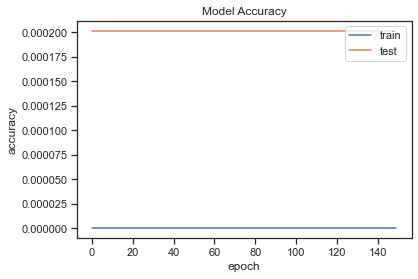

In [57]:
import matplotlib.pyplot as plt
# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train','test'],loc='upper right')
plt.xlabel('epoch');plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

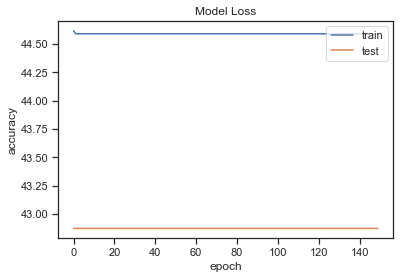

In [58]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper right')
plt.xlabel('epoch');plt.ylabel('accuracy')

# CONCLUSION:
##                            Atmost all the model showing zero accuracy on this gas turbine dataset.Eventhough we performed in mean squared error and mean absolute squared error as loss function on neural network